
Objective of the problem is to predict(Quote) the price of the home to be sold in particular area to the customer 

In [71]:
#Import the packages required to analyse the dataset in hand
import pandas as pd
import numpy as np

In [72]:
#Import the dataset
home=pd.read_csv(r'G:\ML\Datasets\home prices.csv')

In [73]:
#View the dataset
home.head(5)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2,1043,02/17/2016,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007,1167508,"975,700",94103,83152781
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1,903,02/17/2016,750000,37.777641,-122.393417,South of Market,3,Condominium,2004,823719,"975,700",94107,69819817
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3,1425,02/17/2016,1495000,37.759198,-122.396516,Potrero Hill,6,Condominium,2003,1708594,"1,277,600",94107,64972847
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3,2231,02/17/2016,2700000,37.761886,-122.396769,Potrero Hill,10,SingleFamily,1927,2411236,"1,277,600",94107,15149489
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3,1300,02/17/2016,1530000,37.740795,-122.413453,Bernal Heights,4,SingleFamily,1900,1918539,"1,248,000",94110,15161978


In [74]:
#Check the size
home.size


215270

In [75]:
#Check the shape of the dataset
home.shape
#Dataset is a two dimensional array 

(11330, 19)

In [76]:
#Columns present
home.columns

Index(['Unnamed: 0', 'address', 'info', 'z_address', 'bathrooms', 'bedrooms',
       'finishedsqft', 'lastsolddate', 'lastsoldprice', 'latitude',
       'longitude', 'neighborhood', 'totalrooms', 'usecode', 'yearbuilt',
       'zestimate', 'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')

In [77]:
#checking for each observation
pd.isnull(home).sum()
#Ironically we donot have any empty values for any of the 19 features

Unnamed: 0       0
address          0
info             0
z_address        0
bathrooms        0
bedrooms         0
finishedsqft     0
lastsolddate     0
lastsoldprice    0
latitude         0
longitude        0
neighborhood     0
totalrooms       0
usecode          0
yearbuilt        0
zestimate        0
zindexvalue      0
zipcode          0
zpid             0
dtype: int64

In [78]:
#check for the data types
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
Unnamed: 0       11330 non-null int64
address          11330 non-null object
info             11330 non-null object
z_address        11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null int64
finishedsqft     11330 non-null int64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null int64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null int64
usecode          11330 non-null object
yearbuilt        11330 non-null int64
zestimate        11330 non-null int64
zindexvalue      11330 non-null object
zipcode          11330 non-null int64
zpid             11330 non-null int64
dtypes: float64(3), int64(9), object(7)
memory usage: 1.6+ MB


Looking at the data above we have the folloing observations for the data we are dealing with! 
1. There are 215270 total records available
2. 11330 observations and 19 features
3. Neighbourhood,usecode features are categorical data
3. bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,yearbuilt,zpid,zipcode,zindexvalue,zestimate,totalrooms features are numeric values
4. Unnamed,address,info,z_address features are alphanumeric values
5. There are no empty values for any of the features
6. We have combination of categorical,numerical and alpha numeric values
7. Our target variable(dependent variable) is lastsoldprice and based on that we have to predict the price of the home


In [79]:
#Let us look at the dataset
home.describe()

,Unnamed: 0,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zipcode,zpid
count,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,1.133000e+04
mean,9171.729214,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.565695e+06,94116.912004,3.689973e+07
std,4921.941074,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,1.229417e+06,9.400877,7.800741e+07
min,2.000000,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,94102.000000,1.506329e+07
25%,5039.750000,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.052375e+05,94110.000000,1.510847e+07
50%,9198.500000,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.230758e+06,94115.000000,1.515697e+07
75%,13374.750000,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.731170e+06,94123.000000,5.970040e+07
max,17632.000000,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,1.553325e+07,94158.000000,2.146999e+09


In [80]:
home.head(2)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2,1043,02/17/2016,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007,1167508,"975,700",94103,83152781
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1,903,02/17/2016,750000,37.777641,-122.393417,South of Market,3,Condominium,2004,823719,"975,700",94107,69819817


When we look at the zindex value we see it has coma seprated values(string) which can create problem while executing our machine learning model as most of ML learning models predict numeric values we may get unrealistic results when a string is encountered while calculating the value of target variable  
So we will convert zindexvalue values to numeric


In [81]:
home.zindexvalue = home.zindexvalue.str.replace(',','')

In [82]:
home.zindexvalue=pd.to_numeric(home.zindexvalue)

In [83]:
#datatype is converted into numeric variable
home.zindexvalue.head(2)

0    975700
1    975700
Name: zindexvalue, dtype: int64

1. There are total of 18 independent variables and one dependent variable
2. We will select some important features to predict our target variable
3. Let me assume few things while removing the parameters, these are my Assumptions while droping  the features,
        a. let me assume that Unnamed,address,info,z_address these features will not help us to predict the value of the home so we will drop them and create a new data frame
4. For now I will keep 10+1 features for predicting our target variable(Concatenating zindexvalue)


In [84]:
df=home.iloc[:,4:15]
df.head(5)

,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt
0,2.0,2,1043,02/17/2016,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007
1,1.0,1,903,02/17/2016,750000,37.777641,-122.393417,South of Market,3,Condominium,2004
2,4.0,3,1425,02/17/2016,1495000,37.759198,-122.396516,Potrero Hill,6,Condominium,2003
3,3.0,3,2231,02/17/2016,2700000,37.761886,-122.396769,Potrero Hill,10,SingleFamily,1927
4,3.0,3,1300,02/17/2016,1530000,37.740795,-122.413453,Bernal Heights,4,SingleFamily,1900


In [85]:
df=pd.concat([df,home['zindexvalue']],axis=1)
df.head(2)

,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue
0,2.0,2,1043,02/17/2016,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007,975700
1,1.0,1,903,02/17/2016,750000,37.777641,-122.393417,South of Market,3,Condominium,2004,975700


In [86]:
#Analyse the numeric data individually by ploting the graph
#Import the necessary libraries for ploting the graph
import matplotlib.pyplot as plt
%matplotlib inline

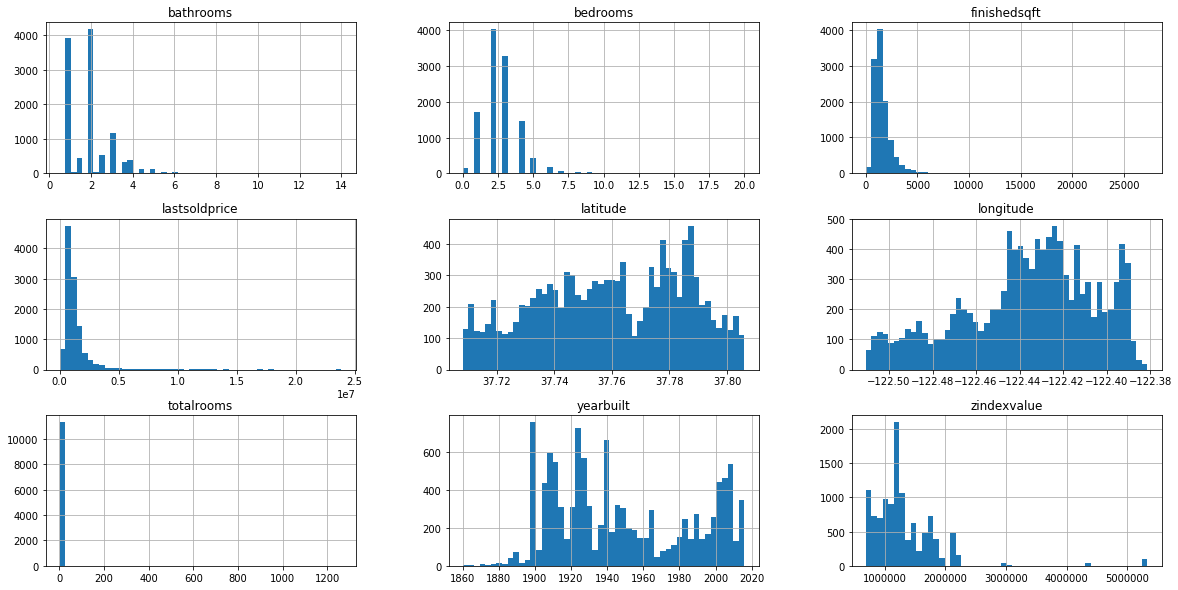

In [87]:
df.hist(bins=50,figsize=(20,10))
plt.show()

In [88]:
#Lets use correlation matrix to find the correlation between the independent and dependent variables

correlation_matrix = df.corr()
correlation_matrix

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
bathrooms,1.000000,0.714270,0.719096,0.536880,0.041632,-0.120276,0.135171,-0.094791,0.249193
bedrooms,0.714270,1.000000,0.697461,0.395478,-0.157859,-0.258338,0.155320,-0.312583,0.164981
finishedsqft,0.719096,0.697461,1.000000,0.647208,0.061655,-0.208110,0.156913,-0.283712,0.338131
lastsoldprice,0.536880,0.395478,0.647208,1.000000,0.283107,-0.052595,0.093527,-0.189055,0.460429
latitude,0.041632,-0.157859,0.061655,0.283107,1.000000,0.117271,-0.007126,0.140987,0.393080
longitude,-0.120276,-0.258338,-0.208110,-0.052595,0.117271,1.000000,-0.054203,0.289189,-0.188348
totalrooms,0.135171,0.155320,0.156913,0.093527,-0.007126,-0.054203,1.000000,-0.061874,0.043554
yearbuilt,-0.094791,-0.312583,-0.283712,-0.189055,0.140987,0.289189,-0.061874,1.000000,-0.219629
zindexvalue,0.249193,0.164981,0.338131,0.460429,0.393080,-0.188348,0.043554,-0.219629,1.000000


In [89]:
#Finding a correlation between dependent and independent variables
correlation_matrix['lastsoldprice'].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.536880
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

1. From the above correlation coefficient values we can see that there is a strong correlation between the independent variable finishedsqft,bathrooms and dependent variable lastsoldprice
2. Let me assume that correlation coefficient value greater than 0.5 holds a strong correlation with dependent variable.
Now let me visualise the same using scattered plot.
I am creating a scaterred matrix plot using pandas library

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000148D0222B38>,
      dtype=object)

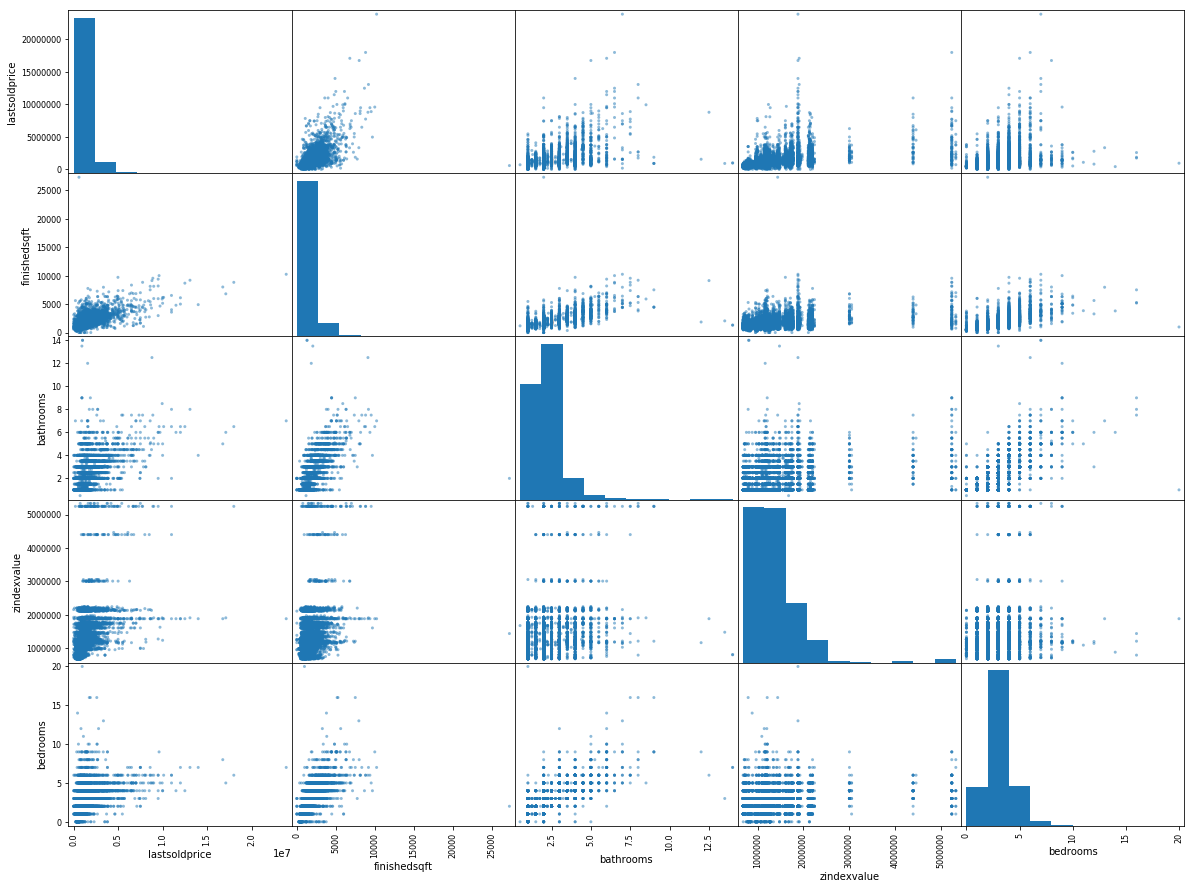

In [90]:
#import pandas library t plot a scattered matrix

pd.scatter_matrix(df[['lastsoldprice','finishedsqft','bathrooms','zindexvalue','bedrooms']],figsize=(20,15))

Observations of scaterred plot
1. There is a  strong linear relation between lastsoldprice and finishedsqft,ie people tend to pay more for homes that are ready to move in.
2. For other features there is no such linear relation observed with target variable
3. Let me take a closer look at the graph between lastsoldprice and finishedsqft

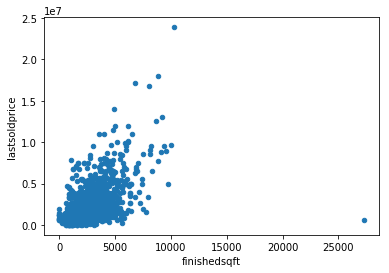

In [91]:
df.plot(kind='scatter',x='finishedsqft',y='lastsoldprice')
plt.show()

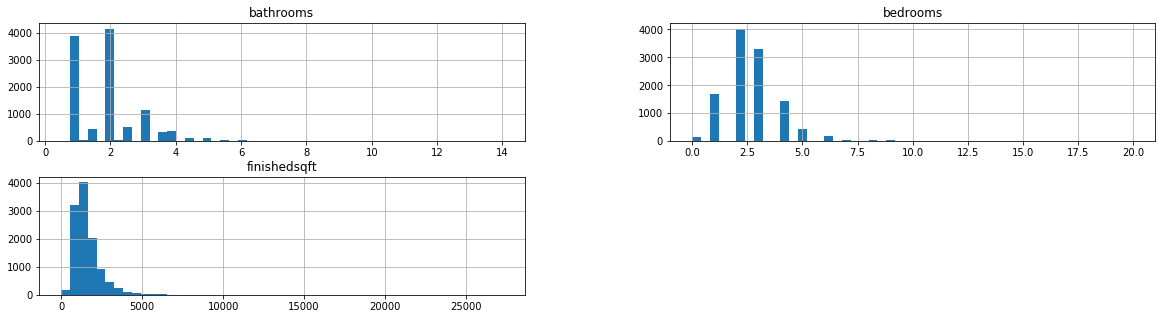

In [92]:
df[['finishedsqft','bedrooms','bathrooms']].hist(bins=50,figsize=(20,5))
plt.show()

Observations from the plots above
1. People tend to buy homes which are ready to movein, but there is a specific sqft they tend to buy(Not very large sqft's)
2. Homes with 2 bathrooms and 2-2.5  bedrooms and finished sqft between 1000-3000 sqft are more likey to be sold.
3. There are very less people who tend to buy largesqft, more bedrooms and bathroom homes.
4. So the home owner(builder) can decide on the price to quote based on the above parameters.
5. Above prediction can hold good to some extent but people tend to buy homes not only on above few features but they look for locality,facilities around their home like schools, hospitals, transit options etc. So the neighbourhood plays a very important feature to quote a price so i will introduce one categorical feature ie neighborhood



In [93]:
#Count of  Each Neighborhood 
df.neighborhood.value_counts().head()

Mission            540
Bernal Heights     525
South of Market    524
South Beach        461
Pacific Heights    439
Name: neighborhood, dtype: int64

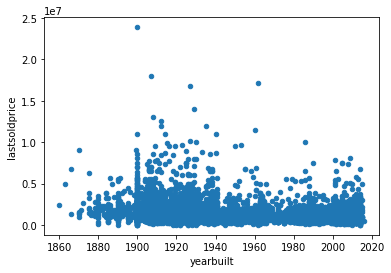

In [94]:
df.plot(kind='scatter',x='yearbuilt',y='lastsoldprice')
plt.show()
#Here there is no proper correlation between lastsoldprice and yearbuilt we can drop this column

In [95]:
df.groupby(['neighborhood','lastsoldprice']).first().head(3)

bathrooms  bedrooms  finishedsqft lastsolddate  \
neighborhood lastsoldprice                                                   
Bayview      3000                 1.0         2          1000   11/16/2015   
             140000               1.0         2           750     04-01-14   
             152500               1.0         1           580   10/31/2014   

                             latitude   longitude  totalrooms       usecode  \
neighborhood lastsoldprice                                                    
Bayview      3000           37.731344 -122.386797           5  SingleFamily   
             140000         37.717567 -122.386436           5   Condominium   
             152500         37.734745 -122.391082           3   Condominium   

                            yearbuilt  zindexvalue  
neighborhood lastsoldprice                          
Bayview      3000                1900       731900  
             140000              2006       719000  
             152500              2009       719000

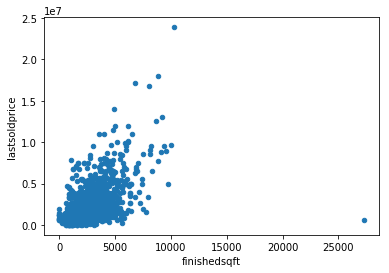

In [96]:
#As we can see from the data and graph, lastsold price is almost linearly changing with finished sqft for a particular neighborhood
df.plot(kind='scatter',x='finishedsqft',y='lastsoldprice')
plt.show()

In [97]:
#Let us find per squareft price for each neighborhood
df['pricepersqft']=df.lastsoldprice/df.finishedsqft
df.head(5)

,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue,pricepersqft
0,2.0,2,1043,02/17/2016,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007,975700,1246.404602
1,1.0,1,903,02/17/2016,750000,37.777641,-122.393417,South of Market,3,Condominium,2004,975700,830.564784
2,4.0,3,1425,02/17/2016,1495000,37.759198,-122.396516,Potrero Hill,6,Condominium,2003,1277600,1049.122807
3,3.0,3,2231,02/17/2016,2700000,37.761886,-122.396769,Potrero Hill,10,SingleFamily,1927,1277600,1210.219632
4,3.0,3,1300,02/17/2016,1530000,37.740795,-122.413453,Bernal Heights,4,SingleFamily,1900,1248000,1176.923077


In [98]:
mean_price=df.groupby('neighborhood').mean()['pricepersqft']
mean_price.head()

neighborhood
Bayview              417.049058
Bernal Heights      3158.199830
Buena Vista Park     952.912618
Central Richmond     659.691461
Central Sunset       610.067525
Name: pricepersqft, dtype: float64

In [99]:
frequency=df.groupby('neighborhood').count()['pricepersqft']
frequency.head()

neighborhood
Bayview             354
Bernal Heights      525
Buena Vista Park     70
Central Richmond    227
Central Sunset      229
Name: pricepersqft, dtype: int64

In [100]:
group=pd.concat([frequency,mean_price],axis=1)
group.columns=['frequency','mean_price']
group.neighborhood=group.index 
group.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,frequency,mean_price
neighborhood,,
Bayview,354,417.049058
Bernal Heights,525,3158.199830
Buena Vista Park,70,952.912618
Central Richmond,227,659.691461
Central Sunset,229,610.067525


In [101]:
group.describe()

,frequency,mean_price
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


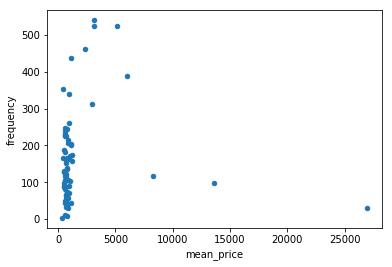

In [102]:
group.plot(kind='scatter',y='frequency',x='mean_price')
plt.show()

#Let me set some standards to analyse the plots drawn
1. Since the 50% of frequency of homes bought is 123 and 50% of mean_price is 756.
2. Let me assume anything under these values to be low and above these values to be high 

In [103]:
cat = df.groupby('neighborhood')
cat.first()
cat1=cat.get_group('Bayview')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


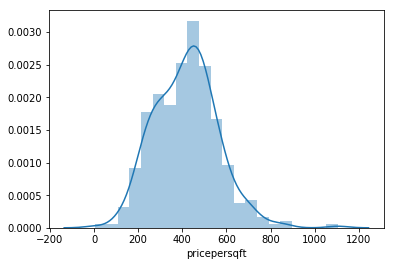

In [104]:
#Density plot for One categorical value
import seaborn as sns
sns.distplot(cat1.pricepersqft)
plt.show()

In [105]:
group[(mean_price<756)].count()
#35 Neighborhood fall under low mean price category

frequency     35
mean_price    35
dtype: int64

In [106]:
group[(mean_price>756)].count()
#36 Neighborhood fall under high price category

frequency     36
mean_price    36
dtype: int64

Neighborhood with High frequency high price

In [107]:
group[(mean_price>756) & (frequency > 123)].count()
#Count of high price and high frequency neighborhood is 21
group1=group[(mean_price>756) & (frequency > 123)]
group1.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')

Neighborhood with high price Low frequency

In [108]:
#group[(mean_price>756) & (frequency < 123)].count()#15
group2=group[(mean_price>756) & (frequency < 123)] 
group2.index

Index(['Buena Vista Park', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Haight-Ashbury', 'Lakeside', 'Lone Mountain', 'Midtown Terrace',
       'North Beach', 'North Waterfront', 'Parnassus - Ashbury',
       'Presidio Heights', 'Sea Cliff', 'St. Francis Wood', 'Telegraph Hill',
       'Twin Peaks'],
      dtype='object', name='neighborhood')

In [109]:
#group[(mean_price<756) & (frequency < 123)].count()#20
#Neighborhood with low price  low frequency
group3=group[(mean_price<756) & (frequency < 123)]
group3.index

Index(['Daly City', 'Forest Hill', 'Forest Hill Extension',
       'Golden Gate Heights', 'Ingleside', 'Ingleside Terrace',
       'Inner Parkside', 'Lakeshore', 'Little Hollywood', 'Merced Heights',
       'Mission Terrace', 'Mount Davidson Manor', 'Oceanview', 'Outer Mission',
       'Silver Terrace', 'Sunnyside', 'West Portal', 'Western Addition',
       'Westwood Highlands', 'Westwood Park'],
      dtype='object', name='neighborhood')

In [110]:
group[(mean_price<756) & (frequency > 123)].count()#14
#Neighborhood with low price high frequency
group4=group[(mean_price<756) & (frequency > 123)]
group4.index

Index(['Bayview', 'Central Richmond', 'Central Sunset', 'Crocker Amazon',
       'Excelsior', 'Ingleside Heights', 'Inner Richmond', 'Inner Sunset',
       'Outer Parkside', 'Outer Richmond', 'Outer Sunset', 'Parkside',
       'Portola', 'Visitacion Valley'],
      dtype='object', name='neighborhood')

In [111]:
#Categorize neighborhood into high and low
def get_group(x):
    if x in group1.index:
        return 'high_price_high_freq'
    elif x in group2.index:
        return 'high_price_low_freq'
    elif x in group3.index:
        return 'low_price_low_freq'
    else:
        return 'low_price_high_freq'
df['group'] = df.neighborhood.apply(get_group)

In [112]:
df.head()

,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue,pricepersqft,group
0,2.0,2,1043,02/17/2016,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007,975700,1246.404602,high_price_high_freq
1,1.0,1,903,02/17/2016,750000,37.777641,-122.393417,South of Market,3,Condominium,2004,975700,830.564784,high_price_high_freq
2,4.0,3,1425,02/17/2016,1495000,37.759198,-122.396516,Potrero Hill,6,Condominium,2003,1277600,1049.122807,high_price_high_freq
3,3.0,3,2231,02/17/2016,2700000,37.761886,-122.396769,Potrero Hill,10,SingleFamily,1927,1277600,1210.219632,high_price_high_freq
4,3.0,3,1300,02/17/2016,1530000,37.740795,-122.413453,Bernal Heights,4,SingleFamily,1900,1248000,1176.923077,high_price_high_freq


In [113]:
#Neighborhood is not required now so we can drop the feature
df.drop(df.columns[7],inplace=True,axis=1)
df.head()

,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,totalrooms,usecode,yearbuilt,zindexvalue,pricepersqft,group
0,2.0,2,1043,02/17/2016,1300000,37.778705,-122.412635,4,Condominium,2007,975700,1246.404602,high_price_high_freq
1,1.0,1,903,02/17/2016,750000,37.777641,-122.393417,3,Condominium,2004,975700,830.564784,high_price_high_freq
2,4.0,3,1425,02/17/2016,1495000,37.759198,-122.396516,6,Condominium,2003,1277600,1049.122807,high_price_high_freq
3,3.0,3,2231,02/17/2016,2700000,37.761886,-122.396769,10,SingleFamily,1927,1277600,1210.219632,high_price_high_freq
4,3.0,3,1300,02/17/2016,1530000,37.740795,-122.413453,4,SingleFamily,1900,1248000,1176.923077,high_price_high_freq


In [114]:
#Droping other unnecessary columns
df.drop(df.columns[[3, 5, 6]], axis=1, inplace=True)
df.head()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,totalrooms,usecode,yearbuilt,zindexvalue,pricepersqft,group
0,2.0,2,1043,1300000,4,Condominium,2007,975700,1246.404602,high_price_high_freq
1,1.0,1,903,750000,3,Condominium,2004,975700,830.564784,high_price_high_freq
2,4.0,3,1425,1495000,6,Condominium,2003,1277600,1049.122807,high_price_high_freq
3,3.0,3,2231,2700000,10,SingleFamily,1927,1277600,1210.219632,high_price_high_freq
4,3.0,3,1300,1530000,4,SingleFamily,1900,1248000,1176.923077,high_price_high_freq


In [115]:
df1 = df
df = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt', 'zindexvalue', 'group', 'lastsoldprice']]
df.tail(10)

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue,group,lastsoldprice
11320,1.0,2,1000,4,SingleFamily,1949,891600,low_price_high_freq,760000
11321,2.0,3,2250,8,SingleFamily,1910,1214400,high_price_high_freq,227500
11322,2.0,3,1806,7,SingleFamily,1924,986000,low_price_low_freq,1300000
11323,1.5,3,1200,5,SingleFamily,1941,720300,low_price_low_freq,810000
11324,1.0,2,884,5,Condominium,1918,1751900,high_price_high_freq,850000
11325,2.0,3,2100,10,SingleFamily,1900,1628900,high_price_high_freq,1950000
11326,2.0,2,977,5,MultiFamily2To4,2006,957300,high_price_high_freq,1030000
11327,1.0,2,875,4,SingleFamily,1950,804400,low_price_low_freq,565000
11328,1.0,2,697,4,SingleFamily,1904,1030300,low_price_high_freq,762000
11329,2.0,3,1539,7,SingleFamily,1976,1214400,high_price_high_freq,950000


In [116]:
df.drop(df.columns[5], axis=1,inplace =True)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,zindexvalue,group,lastsoldprice
0,2.0,2,1043,4,Condominium,975700,high_price_high_freq,1300000
1,1.0,1,903,3,Condominium,975700,high_price_high_freq,750000
2,4.0,3,1425,6,Condominium,1277600,high_price_high_freq,1495000
3,3.0,3,2231,10,SingleFamily,1277600,high_price_high_freq,2700000
4,3.0,3,1300,4,SingleFamily,1248000,high_price_high_freq,1530000


In [117]:
X=df[['bathrooms','bedrooms','finishedsqft','totalrooms','usecode','zindexvalue','group']]
Y=df['lastsoldprice']

In [118]:
#Hot encoding of the Categorical data
g= pd.get_dummies(df.group)
u = pd.get_dummies(df.usecode)
X = pd.concat([X, g, u], axis=1)
drops = ['group', 'usecode']
X.drop(drops, inplace=True, axis=1)
X.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,zindexvalue,high_price_high_freq,high_price_low_freq,low_price_high_freq,low_price_low_freq,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,2.0,2,1043,4,975700,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1.0,1,903,3,975700,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,4.0,3,1425,6,1277600,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3.0,3,2231,10,1277600,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,3.0,3,1300,4,1248000,1,0,0,0,0,0,0,0,0,0,0,0,1,0


Now that we have data with right features for predictions in hand we will train data with different models and chosse the best model using model evaluation techniques.
Train the model usind Train data and then test using test data.
To split our dataset into Test and Train I am using train_test_split from sklearn library  

In [119]:
#Split the data into train and test for model training and testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)



Linear Regression Model

In [120]:
from sklearn.linear_model import LinearRegression
Lineaarregressor = LinearRegression()
Lineaarregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
#Now that we have trained the model I can use it to predict the response value.
y_pred = Lineaarregressor.predict(X_test)
print(' R squared: %.5f' % Lineaarregressor.score(X_test, y_test))

 R squared: 0.55766


The Value of R square is quite small ,ie 55.766% of the Variablity of lastsoldprice(Y) is explained by features "X"
So I will go ahead to use another model evaluation technique I will use RMSE

In [122]:
from sklearn.metrics import mean_squared_error
linear_mse = mean_squared_error(y_pred, y_test)
linear_rmse = np.sqrt(linear_mse)
print('Liner Regression RMSE: %.5f' % linear_rmse)

Liner Regression RMSE: 619063.00652


Model was able to predict the value of every house in test case within  $619063 of the real price
I will use another model to train our data set 

Random Forest Model

In [123]:
from sklearn.ensemble import RandomForestRegressor
forest_regression = RandomForestRegressor(random_state=42)
forest_regression.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [124]:
y_pred = forest_regression.predict(X_test)
print('Random Forest R squared": %.4f' % forest_regression.score(X_test, y_test))

Random Forest R squared": 0.6614


The Value of R square is better than the value calculated using linear regression model ,ie 66.14% of the Variablity of lastsoldprice(Y) is explained by features "X"
We will use another model evaluation technique RMSE

In [125]:
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.5f' % forest_rmse)

Random Forest RMSE: 541593.00201


Random forest Model was able to predict the value of every house in test case within  $541593 of the real price

Gradient Boosting Model

In [126]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [127]:
y_pred = model.predict(X_test)
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.6653


The Value of R square is better than the value calculated using linear regression model ,ie 66.26% of the Variablity of lastsoldprice(Y) is explained by features "X". The value is better then Linear Regression and Random Forest Model
We will use another model evaluation technique RMSE

In [128]:
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 538537.0618


Gradient Boosting Model was able to predict the value of every house in test case within  $538612 of the real price

From the 3 models used above gradient Boosting gives best results with less Variablity so we can use "Gradient Boosting" model to predict the value of homes in the future.

We can use cross validation technique (KFolds cross validation ) for model selection and evaluation

In [129]:
#Function for training and testing dataset with different models
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [130]:
#Creating a empty list to store scores calculated by using KFolds technique 
score_regression=[]
score_randomforest=[]
score_gradientboost=[]
#Selecting StratifiedKFold Technique for Model Selection from Sklearn
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=5)#Selecting the value of folds to 5
#Splitting data into test and train
for train_index , test_index in folds.split(X,Y):
    X_train,X_test = X.iloc[train_index] , X.iloc[test_index]
    y_train,y_test = Y.iloc[train_index] , Y.iloc[test_index]
    score_regression.append(get_score(LinearRegression(),X_train,X_test,y_train,y_test))
    score_randomforest.append(get_score(RandomForestRegressor(random_state=21),X_train,X_test,y_train,y_test))
    score_gradientboost.append(get_score(ensemble.GradientBoostingRegressor(random_state=21),X_train,X_test,y_train,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [131]:
sum(score_regression)/len(score_regression)

0.44153925993359655

In [132]:
sum(score_randomforest)/len(score_randomforest)

0.5414505117871723

In [133]:
sum(score_gradientboost)/len(score_gradientboost)

0.5952842474768808

Gradient Boosting Model was able to predict results better then Random Forest and Linear Regression